# Exercise 4.pdf

The R code provided performs several tasks related to statistical modeling and analysis, particularly focusing on the use of generalized additive models for location, scale, and shape (GAMLSS) and truncated distributions. Here's a breakdown of its main components and actions:

1. **Installation and Loading of Packages**: The script begins by attempting to install the `gamlss.inf` package, which is likely a typo or a custom function not standard in R, as the correct function to install packages is `install.packages()`. Then, it defines new family distributions and truncated distributions using functions like `gen.Family()`, `gen.Inf0to1()`, and `gen.trun()`.

2. **Setting Seed for Reproducibility**: `set.seed(10)` ensures that any random operations can be replicated in future runs.

3. **Loading the `gamlss.tr` Library and Data**: It loads the `gamlss.tr` library, which is used for fitting truncated and censored distributions in the GAMLSS framework. It then loads the `tensile` dataset, which is likely used for modeling.

4. **Generation of Truncated Distributions**: The script generates truncated versions of various distributions (`GA`, `LOGNO`, `TF`) with specified parameters.

5. **Fitting Distributions to Data**: It attempts to fit different truncated distributions to the `tensile` dataset using a custom function `fitDist()`, which is not standard in R and is presumably defined elsewhere or is part of a loaded package.

6. **Creating and Modeling Inflated Distributions**: The script generates data from an inflated distribution (at zero for `logitSST` and at one for `BEINF1`) and fits GAMLSS models to this data. This part includes examples of fitting distributions with inflation at specific points (0 or 1), showcasing the flexibility of GAMLSS in handling complex distributional forms.

7. **Model Comparisons and Checks**: It compares the deviances of different model fits to check for consistency or equivalence, using `stopifnot()` to assert that certain conditions are true. This is a method to ensure that the models are performing as expected.

8. **Additional Data Analysis with Another Dataset (`glass`)**: The script performs similar actions as above but with a different dataset, `glass`, focusing on fitting distributions and analyzing the `strength` variable. It includes generating a truncated distribution, fitting a distribution, and visualizing the distribution of `strength` using a histogram.

Overall, the script showcases advanced usage of the GAMLSS framework for modeling complex data distributions, including truncated and inflated-at-specific-points distributions. It performs data fitting, model checking, and visualization tasks, although it assumes the presence of certain custom functions or packages (`fitDist()`, `gamlss.inf`, etc.) that are not standard in R's base or commonly used packages.

In [9]:
# install.packages('gamlss.inf')
library(gamlss.inf)

In [10]:
gen.Family("SST", "logit")
gen.Inf0to1("logitSST","Zero")
set.seed(10)

A  logit  family of distributions from SST has been generated 
 and saved under the names:  
 dlogitSST plogitSST qlogitSST rlogitSST logitSST 
A  0 inflated logitSST distribution has been generated 
 and saved under the names:  
 dlogitSSTInf0 plogitSSTInf0 qlogitSSTInf0 rlogitSSTInf0 
 plotlogitSSTInf0 


In [12]:
library(gamlss.tr)
data(tensile)

In [13]:
gen.trun(par=1,family="GA", type="right")
gen.trun(par=1,"LOGNO", type="right")
gen.trun(par=c(0,1),"TF", type="both")
ma <- fitDist(str, type="real0to1", trace=T, extra=c("GAtr", "LOGNOtr", "TFtr"), data=tensile)

A truncated family of distributions from GA has been generated 
 and saved under the names:  
 dGAtr pGAtr qGAtr rGAtr GAtr 
The type of truncation is right 
 and the truncation parameter is 1  
A truncated family of distributions from LOGNO has been generated 
 and saved under the names:  
 dLOGNOtr pLOGNOtr qLOGNOtr rLOGNOtr LOGNOtr 
The type of truncation is right 
 and the truncation parameter is 1  
A truncated family of distributions from TF has been generated 
 and saved under the names:  
 dTFtr pTFtr qTFtr rTFtr TFtr 
The type of truncation is both 
 and the truncation parameter is 0 1  
----------------------------------------  
fitting different real0to1 distributions 
  |=====                                                                 |   8%1   BE -2.610127 
  |===========                                                           |  15%2   BEo -2.610127 
  |================                                                      |  23%Error in solve.default(oout$hessian) 

Warning message in MLE(ll4, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 function evaluation limit reached without convergence (9)”


10   GB1 -0.06275114 
  |===========================================================           |  85%11   GAtr -2.97571 
  |=================================================================     |  92%12   LOGNOtr -3.675824 
  |======================================================================| 100%Error in solve.default(oout$hessian) : 
  Lapack routine dgesv: system is exactly singular: U[3,3] = 0
13   TFtr -0.679559 



In [ ]:
Y <- rlogitSSTInf0(300,mu=0.5,sigma=0.7,nu=0.5,tau=5,xi0=0.5,log=FALSE)
m1 <- gamlssInf0to1(y=Y, mu.formula=~1,
                    sigma.formula=~1,
                    nu.formula=~1,
                    tau.formula=~1,
                    xi0.formula=~1,
                    family=logitSST,
                    trace = TRUE)

## 2. Example of equivalent gamlss models for an inflated-at-1 Beta distribution

In [14]:
Y <- rBEINF1(500,mu=0.5,sigma=0.7,nu=0.5)
m2 <- gamlss(Y~1,sigma.formula=~1,nu.formula=~1,family=BEINF1)
m3.1 <- gamlss(Y[Y<1]~1,sigma.formula=~1,family=BE)
m3.2 <- gamlss(I(Y==1)~1,family=BI)
m4 <- gamlssInf0to1(Y,
                    mu.formula=~1,
                    sigma.formula=~1,
                    xi1=~1,
                    family=BE)

stopifnot(all.equal(deviance(m2),(deviance(m3.1)+deviance(m3.2))), all.equal(deviance(m2),deviance(m4)))

GAMLSS-RS iteration 1: Global Deviance = 554.1933 
GAMLSS-RS iteration 2: Global Deviance = 554.0334 
GAMLSS-RS iteration 3: Global Deviance = 554.0334 
GAMLSS-RS iteration 1: Global Deviance = -90.7419 
GAMLSS-RS iteration 2: Global Deviance = -90.9018 
GAMLSS-RS iteration 3: Global Deviance = -90.9018 
GAMLSS-RS iteration 1: Global Deviance = 644.9353 
GAMLSS-RS iteration 2: Global Deviance = 644.9353 


### fitting truncated

In [15]:
data(glass)
library(gamlss.tr)
gen.trun(par = 0, family = TF)

A truncated family of distributions from TF has been generated 
 and saved under the names:  
 dTFtr pTFtr qTFtr rTFtr TFtr 
The type of truncation is left 
 and the truncation parameter is 0  


In [16]:
m1<-fitDist(strength, data=glass, k=2, extra="TFtr")

  |===========                                                           |  15%

Warning message in MLE(ll3, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |============                                                          |  17%

Warning message in MLE(ll3, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |================                                                      |  23%

Warning message in MLE(ll3, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |==========================                                            |  37%

Warning message in MLE(ll4, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |============================                                          |  40%

Warning message in MLE(ll4, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |==============================                                        |  42%

Warning message in MLE(ll4, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |=======================================                               |  56%

Warning message in MLE(ll4, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |====================================================                  |  75%

Warning message in MLE(ll2, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma), :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |======================================================                |  77%

Warning message in MLE(ll2, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma), :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |=======================================================               |  79%

Warning message in MLE(ll2, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma), :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |===================================================================== |  98%

Warning message in nlminb(start = start, objective = f, control = optim.control):
“NA/NaN function evaluation”
Warning message in MLE(ll4, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”


  |======================================================================| 100%


'#' AIC

'#' SBC


SEP4     SEP3   SHASHo  SHASHo2     SEP1     SEP2    SHASH      GB2 
27.65361 27.97321 28.01800 28.01800 29.00072 29.05912 29.31591 29.52121

Warning message in MLE(ll4, start = list(eta.mu = eta.mu, eta.sigma = eta.sigma, :
“possible convergence problem: optim gave code=1 false convergence (8)”



Family:  c("SEP4", "skew exponential power type 4") 
Fitting method: "nlminb" 

Call:  gamlssML(formula = glass$strength, family = "SEP4") 

Mu Coefficients:
[1]  1.61
Sigma Coefficients:
[1]  -1.839
Nu Coefficients:
[1]  -0.3338
Tau Coefficients:
[1]  0.0602

 Degrees of Freedom for the fit: 4 Residual Deg. of Freedom   59 
Global Deviance:     19.6536 
            AIC:     27.6536 
            SBC:     36.2262 

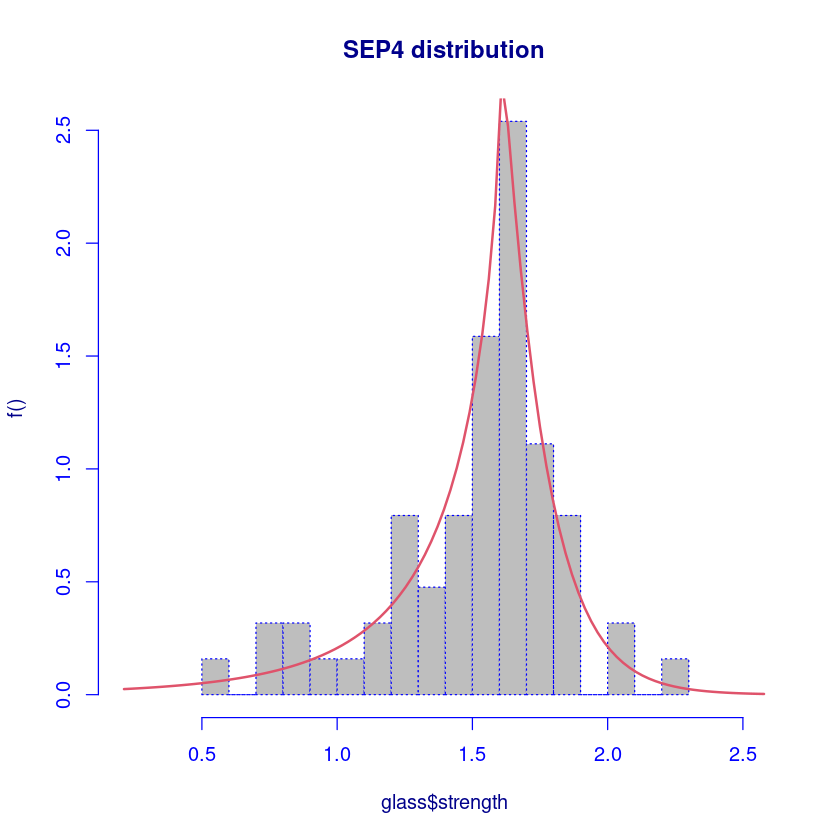

In [17]:
m1$fit[1:8]
histDist(glass$strength, SEP4, nbins = 13,
         main = "SEP4 distribution",
         method = mixed(20, 50))